<a href="https://colab.research.google.com/github/higshitani/higshitani.github.io/blob/main/PY_DS_2021_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#「Pythonによるデータ科学入門」 DAY 7 のスライド中のコード

In [ ]:
# coding: utf-8
import math
import numpy as np
from sklearn.linear_model import LogisticRegression

def prob1(x,beta,mu):
    return 1.0/(1.0 + math.exp(-beta*(x-mu)))

data = np.loadtxt("sample-score.txt")

x = np.array([data[:,0]]).T
y = data[:,1]

lr = LogisticRegression()
res = lr.fit(x,y)

beta = lr.coef_[0,0]
mu = -lr.intercept_[0]/beta
print('beta=',beta)
print('mu=',mu)

logL=0
for x,y in data:
    if y==1:
        logL += math.log(prob1(x,beta,mu))
    elif y==0:
        logL += math.log(1-prob1(x,beta,mu))

print("logL=",logL)


In [ ]:
# coding: utf-8
import random
import math

N=1000000
cnt=0
for _ in range(N):
    x = random.random()
    y = random.random()
    z = random.random()
    if x**2 + y**2 + z**2 < 1:
        cnt = cnt + 1
    else:
        cnt = cnt + 0

v = cnt/N*8
v0 = 4*math.pi/3
print('v=',v,v0)

In [ ]:
# coding: utf-8

import numpy as np
import math

d = 5

N=100000
cnt=0
for _ in range(N):
    x = np.random.rand(d)
    if np.linalg.norm(x) < 1:
        cnt += 1

v = cnt/N * 2**d

v0 = math.pi**(d/2)/math.gamma(d/2+1)

print('v=',v,v0)


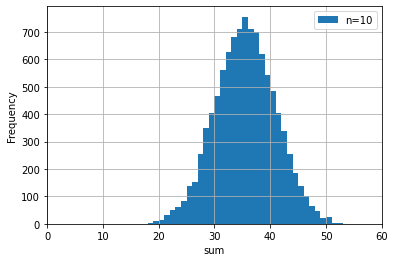

In [ ]:
# coding: utf-8                                                                                                                                                                            
import random
import numpy as np
import matplotlib.pyplot as plt

ntrial = 10000

dice10=[ ]

for _ in range(ntrial):
    s10=0
    for _ in range(10):
        s10 = s10 + random.randint(1,6)
    dice10.append(s10)

bins = np.linspace(0, 100, 101)

plt.hist(dice10, bins, label="n=10")
plt.xlabel('sum')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.xlim(0,60)
plt.grid(True)
plt.show()

In [ ]:
# coding: utf-8                                                                                                                                          
import random

ntrial=10000

n_you_win=0
for _ in range(ntrial):
    prize = random.choice(['A','B','C'])
    you_first_chose = random.choice(['A','B','C'])
    doors={'A','B','C'}
    doors.discard(prize)
    doors.discard(you_first_chose)
    monty_opened = random.choice(list(doors))
    doors={'A','B','C'}
    doors.discard(monty_opened)
    doors.discard(you_first_chose)
    you_finally_chose = doors.pop()
    if you_finally_chose==prize:
        n_you_win += 1

print("p=",n_you_win/ntrial)


p= 0.6658


data= [ 5  5  4  4  5  5  7  1  5  8  5  5  5  2  7  1  6  6  5  2  7  7  8  4
  7  3  7  5  5  3  3 15  4  6  4  8  1  7  8  4  5  3  4  3  7  5  4  5
  2  7  3  6  3  4  7  5  5  6  6  6  5  3  5  6  7  5  6  6  8 10  2  8
  7  4  3 10  6  2  7  5  6  8  4  6  7  3  3  8  5  7  4  5 10  4  7  5
  3  6  5  5]
lambda= 5.31


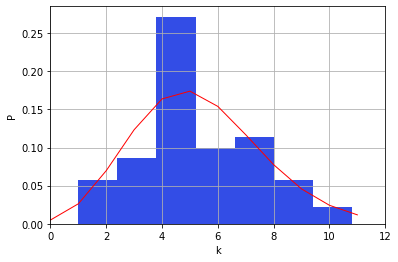

In [ ]:
# coding: utf-8
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

# 乱数発生
X = poisson.rvs(5.0, size=100)
print('data=',X)

# 最尤推定
N = X.shape[0]
lam = sum(X)/N
print('lambda=',lam)

x = np.arange(0, poisson.ppf(0.99, lam)+1)

plt.hist(X,density=True,color=(0.2, 0.3, 0.9))
plt.plot(x,poisson.pmf(x,lam),'-',color=(1.0,0,0.0),linewidth=1.0)
plt.xlim(0,max(x)+1)
plt.xlabel('k')
plt.ylabel('P')
plt.grid(True)
plt.show()


In [ ]:
# coding: utf-8                                                                                                                                          
import random

mu0=2.0
var0=mu0**2
n=5
ntrial=1000
for _ in range(ntrial):
    X=[]
    for _ in range(n):
        X.append(random.expovariate(1/mu0))
    mu=sum(X)/n
    s2=0
    for x in X:
        s2 += (x-mu)**2
    u2=s2/(n-1)